# Proyek Analisis Data: Bike Sharing
- **Nama:** INDERA NURUL ALAM
- **Email:** alamaindra@gmail.com
- **ID Dicoding:** inderaalam

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata kenaikan dan penurunan jumlah orang yang menyewa sepedah dalam beberapa bulan?
- Bagaimana musim mempengaruhi orang untuk menyewa sepedah?
- Kondisi cuaca seperti apa yang mempengaruhi orang untuk menyewa sepedah?

## Import Semua Packages/Library yang Digunakan

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [120]:
data_sewa_day = pd.read_csv("./data/day.csv")
data_sewa_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [121]:
data_sewa_hours = pd.read_csv("./data/hour.csv")
data_sewa_hours.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- output dari kode akan memunculkan dataframe data_sewa_day dan data_sewa_hours yang berjumlah masing-masingg 5 baris

### Assessing Data

In [122]:
data_sewa_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [123]:
data_sewa_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [124]:
print("Jumlah duplikasi : ", data_sewa_day.duplicated().sum())
data_sewa_day.describe()

Jumlah duplikasi :  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [125]:
data_sewa_day[data_sewa_day.hum == data_sewa_day.hum.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


In [126]:
data_sewa_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [127]:
data_sewa_hours.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [128]:
print("Jumlah duplikasi : ", data_sewa_hours.duplicated().sum())
data_sewa_hours.describe()

Jumlah duplikasi :  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [129]:
data_sewa_hours[data_sewa_hours.hum == data_sewa_hours.hum.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


**Insight:**
- pada data data_sewa_day dan data_sewa_hours tidak missing value dan data duplicate
- tetapi pada kedua data tersebut terdapat data inaccurate pada bagian hum, dan dteday yang bertipe data object yang seharusnya date 

### Cleaning Data

In [130]:
data_sewa_day['dteday'] = pd.to_datetime(data_sewa_day['dteday'])
data_sewa_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [131]:
data_sewa_day = data_sewa_day[data_sewa_day['hum'] != 0]
data_sewa_day[data_sewa_day.hum == data_sewa_day.hum.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635


In [132]:
data_sewa_hours['dteday'] = pd.to_datetime(data_sewa_hours['dteday'])
data_sewa_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [133]:
data_sewa_hours['hum'] = data_sewa_hours['hum'].replace(0, np.nan)
data_sewa_hours['hum'] = data_sewa_hours['hum'].interpolate()
data_sewa_hours[data_sewa_hours.hum == data_sewa_hours.hum.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1109,1110,2011-02-18,1,0,2,23,0,5,1,1,0.52,0.5,0.08,0.2836,16,61,77


**Insight:**
- melakukan cleaning data pada dengan melakukan drop dan interpolaso pada hum
- melakukan penggantian tipe data dteday yang bertipe data object diubah menjadi date 
- xxx

## Exploratory Data Analysis (EDA)

## Explore...

In [156]:
data_sewa_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,366.406849,2012-01-01 09:45:51.780822016,2.498630,0.501370,6.524658,0.028767,2.995890,0.683562,1.393151,0.495530,0.474475,0.628754,0.190388,849.275342,3660.390411,4509.665753
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,184.250000,2011-07-03 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,0.520521,0.134950,316.250000,2502.250000,3169.750000
50%,366.500000,2012-01-01 12:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499167,0.487364,0.627083,0.180971,717.000000,3664.500000,4548.500000
75%,548.750000,2012-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.730313,0.233207,1096.500000,4783.250000,5966.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.023699,NaN,1.110184,0.500341,3.451815,0.167266,2.005817,0.465405,0.542015,0.183134,0.163040,0.140614,0.077506,686.449738,1557.149836,1933.194931


In [158]:
data_sewa_day.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.410693,0.865864,0.495761,0.015835,0.000950,-0.003031,-0.015912,0.149698,0.151825,0.007987,-0.111058,0.273629,0.658468,0.627545
dteday,1.000000,1.000000,0.410693,0.865864,0.495761,0.015835,0.000950,-0.003031,-0.015912,0.149698,0.151825,0.007987,-0.111058,0.273629,0.658468,0.627545
season,0.410693,0.410693,1.000000,-0.003701,0.831183,-0.010868,-0.002159,0.013762,0.024832,0.333735,0.342366,0.200230,-0.227760,0.208695,0.409580,0.404013
yr,0.865864,0.865864,-0.003701,1.000000,-0.003197,0.007724,-0.004778,-0.001081,-0.044983,0.046850,0.045400,-0.118371,-0.010566,0.247343,0.593533,0.565907
mnth,0.495761,0.495761,0.831183,-0.003197,1.000000,0.018964,0.010218,-0.004956,0.047967,0.219601,0.226905,0.219132,-0.206481,0.121572,0.291715,0.278139
holiday,0.015835,0.015835,-0.010868,0.007724,0.018964,1.000000,-0.101862,-0.252948,-0.034137,-0.028700,-0.032642,-0.017208,0.006513,0.054050,-0.109505,-0.069012
weekday,0.000950,0.000950,-0.002159,-0.004778,0.010218,-0.101862,1.000000,0.035341,0.029246,0.000229,-0.007166,-0.049885,0.013660,0.060792,0.058889,0.069020
workingday,-0.003031,-0.003031,0.013762,-0.001081,-0.004956,-0.252948,0.035341,1.000000,0.058826,0.053230,0.052717,0.028830,-0.019672,-0.517604,0.306663,0.063217
weathersit,-0.015912,-0.015912,0.024832,-0.044983,0.047967,-0.034137,0.029246,0.058826,1.000000,-0.118994,-0.120126,0.620839,0.036026,-0.244319,-0.254611,-0.291838
temp,0.149698,0.149698,0.333735,0.046850,0.219601,-0.028700,0.000229,0.053230,-0.118994,1.000000,0.991699,0.125160,-0.157338,0.542988,0.540009,0.627774


In [168]:
data_sewa_day.groupby(by='mnth').agg({
    'cnt': ['mean','max', 'min'],
     'temp': 'mean',          
    'hum': 'mean',       
    'windspeed': 'mean'
    ''
})

cnt                  temp       hum windspeed
             mean   max   min      mean      mean      mean
mnth                                                       
1     2176.338710  4521   431  0.236444  0.585828  0.206303
2     2655.298246  5062  1005  0.299226  0.567465  0.215684
3     3742.573770  8362   605  0.390562  0.598122  0.222057
4     4484.900000  7460   795  0.469999  0.588063  0.234482
5     5349.774194  8294  2633  0.594798  0.688958  0.182989
6     5772.366667  8120  3767  0.684097  0.575806  0.185420
7     5563.677419  8173  3285  0.755470  0.597876  0.166059
8     5664.419355  7865  1115  0.708582  0.637730  0.172918
9     5766.516667  8714  1842  0.616485  0.714714  0.165945
10    5199.225806  8156    22  0.485012  0.693761  0.175205
11    4247.183333  6852  1495  0.369220  0.624876  0.183801
12    3403.806452  6606   441  0.324031  0.666041  0.176609

In [165]:
data_sewa_day.groupby(by='season').agg({
    'cnt': ['max', 'min'],
    'temp': 'mean',          
    'hum': 'mean',       
    'windspeed': 'mean'
})

cnt            temp       hum windspeed
         max   min      mean      mean      mean
season                                          
1       7836   431  0.297240  0.586141  0.214274
2       8362   795  0.544405  0.626948  0.203507
3       8714  1115  0.706309  0.633482  0.172095
4       8555    22  0.422906  0.668719  0.171995

In [182]:
data_sewa_day.groupby(by='weathersit').agg({
    'cnt': ['max', 'min'],
     'temp': 'mean',          
    'hum': 'mean',       
    'windspeed': 'mean'
})

cnt           temp       hum windspeed
             max  min      mean      mean      mean
weathersit                                         
1           8714  431  0.511541  0.565594  0.190253
2           8362  605  0.470366  0.725887  0.186431
3           4639   22  0.435658  0.891316  0.242409

**Insight:**
- mendapatkan hubungan bahwa musim mempengaruhi jumlah minimum dan maximum dari cnt atau jumlah orang yang sewa sepedah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

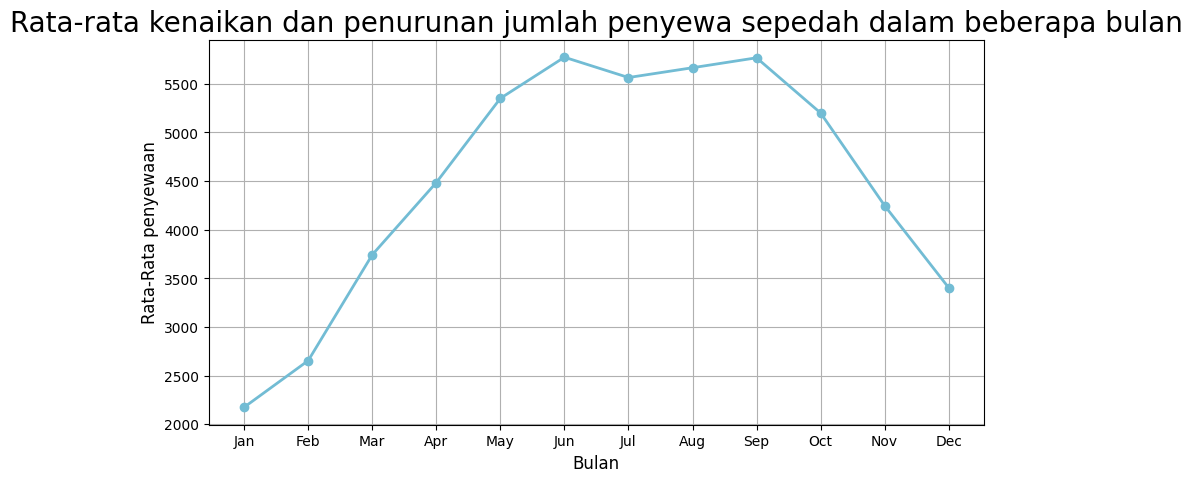

<Figure size 640x480 with 0 Axes>

In [181]:
data_bulan = data_sewa_day.groupby(by='mnth').agg({
    'cnt': ['mean', 'max', 'min'],
    'temp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
})

data_bulan.columns = ['_'.join(col) for col in data_bulan.columns]

plt.figure(figsize=(10, 5))
plt.plot(data_bulan.index, data_bulan["cnt_mean"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Rata-rata kenaikan dan penurunan jumlah penyewa sepedah dalam beberapa bulan", loc="center", fontsize=20)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Rata-Rata penyewaan", fontsize=12)
plt.xticks(ticks=monthly_stats_df.index, labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=10)
plt.grid(True)
plt.show()

plt.tight_layout()
plt.show()

### Pertanyaan 2:

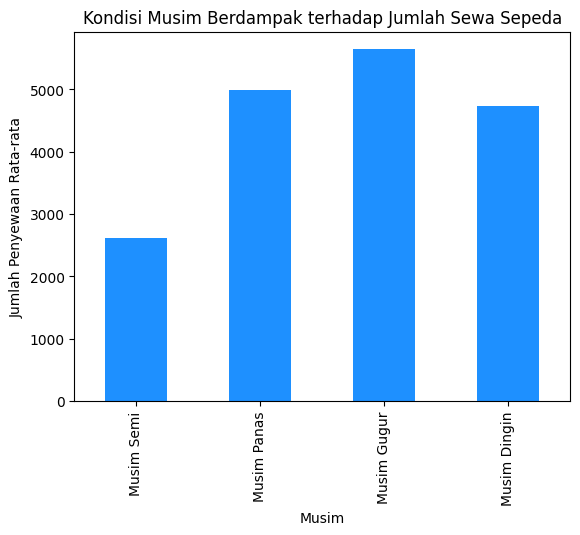

In [204]:
data_musim = data_sewa_day.groupby(by='season').agg({
    'cnt': 'mean'
})

label_season = {1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'}
data_musim.index = data_musim.index.map(label_season)

colors = ['#1E90FF', '#4682B4', '#00008B', '#ADD8E6']

data_musim.plot(kind='bar', 
                 title='Kondisi Musim Berdampak terhadap Jumlah Sewa Sepeda', 
                 color=colors, 
                 legend=False)

plt.ylabel('Jumlah Penyewaan Rata-rata')
plt.xlabel('Musim')
plt.show()

### Pertanyaan 3:

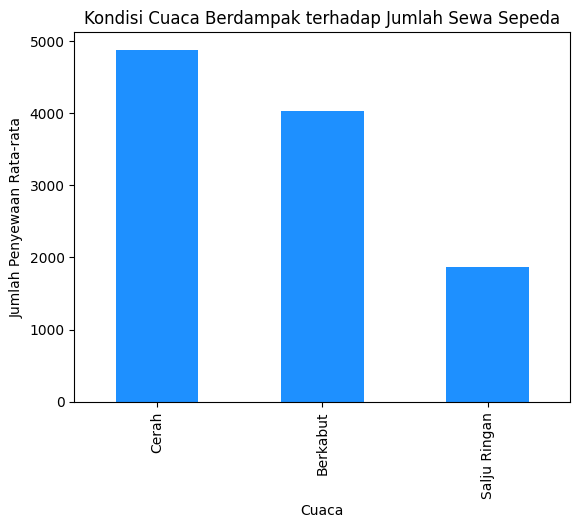

In [199]:
data_cuaca = data_sewa_day.groupby(by='weathersit').agg({
    'cnt': 'mean'
})

label_weathersit = {1: 'Cerah', 2: 'Berkabut', 3: 'Salju Ringan'}
data_cuaca.index = data_cuaca.index.map(label_weathersit)

colors = ['#1E90FF', '#4682B4', '#00008B']

data_cuaca.plot(kind='bar', 
                title='Kondisi Cuaca Berdampak terhadap Jumlah Sewa Sepeda', 
                color=colors, 
                legend=False)

plt.ylabel('Jumlah Penyewaan Rata-rata')
plt.xlabel('Cuaca')
plt.show()

**Insight:**
1. dari hasil terlihat terjadi kenaikan jumlah orang yang menyewa sepedah pada bulan juni dan september, dan jumlah paling sedikit yaitu pada bulan januari 
2. pada hasil kedua musim berdampak terhadap jumlah penyewa sepedah dimana pada saat musim gugur jumlah orang yang sewa sepedah paling banyak
dan pada musim semi jumlah orang yang sewa sepedah paling rendah
3. pada hasil ketiga cuaca berdampak pada jumlah sewa sepedah. orang-orang  paling banyak menyewa sepedah pada saat cuaca cerah, dan sedikit pada saat cuaca turun salju ringan

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1
  Berapa rata-rata kenaikan dan penurunan jumlah orang yang menyewa sepedah dalam beberapa bulan?
  dari hasil analisis bahwa didapatkan adanya peningkatan junmlah orang yang yang menyewa sepedah pada bulan juni dan september. hal ini dikarenakan kemungkinan cuaca pada bulan tersebut sangat mendukung orang-orang untuk aktivitas diluar rumah, sehingga adanya trend peningkatan, sedangkan jumlah yang sangat sedikit pada bulan januari hal ini bisa disebabkan karena pada bulan tersebut cuaca yang  ada kurang diminati oleh orang-orang bersepedah
- Conclusion pertanyaan 2
  Bagaimana musim mempengaruhi orang untuk menyewa sepedah?
dari hasil analisis didapatkan bahwa musim gugur adalah musim yang paling banyak orang-orang bersepedah sehingga terjadi peningkatan untuk jumlah penyewa sepedah
- Conclusion pertanyaan 3
  Kondisi cuaca seperti apa yang mempengaruhi orang untuk menyewa sepedah?
yang terakhir dari hasil analisis didapatkan bahwa orang-orang cenderung paling banyak bersepedah pada saat cuaca cerah hal ini mengakibatkan meningkatnya jumlah penyewa sepedah, dan sebaliknya pada saat cuaca turun salju ringan orang-orang kurang minatt untu bersepedah sehingga jumlah penyewa sepedah cendeerung sedikit.